In [1]:
import numpy as np
import matplotlib.pyplot as plt

In this notebook we demonstrate logistic regression on fake data in one and two dimensions.

-JM Murray, https://murraylab.uoregon.edu

# Fitting one-dimensional data with logistic regression

In [185]:
# Make up some one-dimensional data from two classes.

nA = 50
xA = np.random.randn(nA)

nB = 40
xB = 2 + 0.75*np.random.randn(nB)

Text(0, 0.5, 'y')

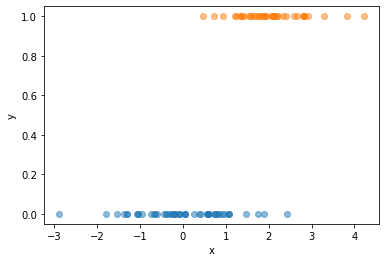

In [186]:
# Plot the data.

plt.plot(xA, np.zeros(nA), 'o', alpha=0.5)
plt.plot(xB, np.ones(nB), 'o', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'Count')

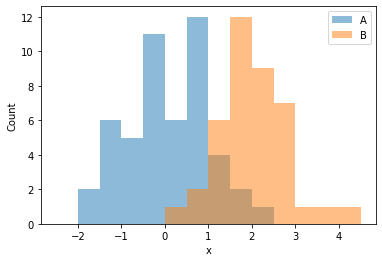

In [187]:
# Plot the data as a histogram.

plt.hist(xA, alpha=0.5, bins=np.arange(-2.5, 5, 0.5))
plt.hist(xB, alpha=0.5, bins=np.arange(-2.5, 5, 0.5))
plt.legend(['A', 'B'])
plt.xlabel('x')
plt.ylabel('Count')

In [188]:
# Reformat the data.

X = np.append(xA, xB)
X = np.reshape(X, (len(X),1))  # X should be n_samples by n_variables

y = np.append(np.zeros_like(xA), np.ones_like(xB))  # y should have length n_samples

In [189]:
# Fit a logistic regression model with built-in cross validation.

from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV().fit(X, y)
a = clf.coef_[0,0]
b = clf.intercept_[0]
print('(Coefficient, Intercept): ', (a, b))

print('Testing accuracy: ', clf.score(X, y))

(Coefficient, Intercept):  (2.62304093852399, -3.1565764965623666)
Testing accuracy:  0.9222222222222223


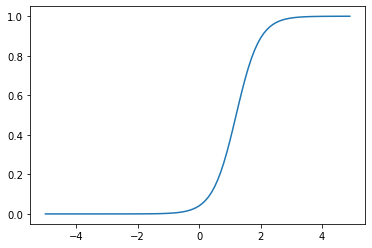

In [190]:
# To see what the coefficient and intercept mean, plot the sigmoid curve.

def sigma(h):
    return 1/(1 + np.exp(-h))

x_array = np.arange(-5,5,0.1)
plt.plot(x_array, sigma(a*x_array + b))

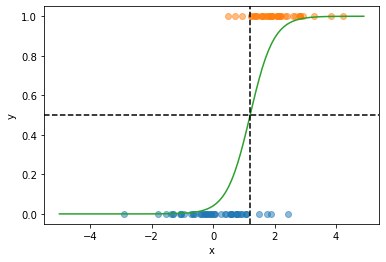

In [195]:
# Plot the fit together with the data.

# Plot the data again:
plt.plot(xA, np.zeros_like(xA), 'o', alpha=0.5)
plt.plot(xB, np.ones_like(xB), 'o', alpha=0.5)

# Plot the fit:
x_array = np.arange(-5,5,0.1)
plt.plot(x_array, clf.predict_proba(np.reshape(x_array,(-1,1)))[:,1])

# Plot the sigmoid curve using the given slope and intercept (should match the preceding plot):
#plt.plot(x_array, sigma(a*x_array + b))

plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x=-b/a, color='k', linestyle='--')
plt.axhline(y=0.5, color='k', linestyle='--')

# Fitting two-dimensional data with logistic regression

In [206]:
# Make up some two-dimensional data

nA = 50
muA = np.array([1., 1.])
sigA = np.eye(2)
xA = np.random.multivariate_normal(muA, sigA, nA)

nB = 40
muB = np.array([-1., -0.5])
sigB = 0.75*np.eye(2)
xB = np.random.multivariate_normal(muB, sigB, nB)

Text(0, 0.5, 'x2')

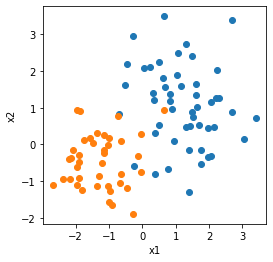

In [212]:
# Plot the data

plt.figure(figsize=(4,4))
plt.plot(xA[:,0], xA[:,1], 'o')
plt.plot(xB[:,0], xB[:,1], 'o')
plt.xlabel('x1')
plt.ylabel('x2')

In [208]:
# Reformat the data.

X = np.vstack((xA, xB))  # X should be n_samples by n_variables, where n_samples=nA+nB

y = np.append(np.zeros(nA), np.ones(nB))  # y should have length n_samples

In [209]:
# Fit a logistic regression model with built-in cross validation.

from sklearn.linear_model import LogisticRegressionCV

clf2 = LogisticRegressionCV().fit(X, y)
a = clf2.coef_[0,:]
b = clf2.intercept_[0]
print('(Coefficient, Intercept): ', (a, b))

print('Testing accuracy: ', clf2.score(X, y))

(Coefficient, Intercept):  (array([-0.81237653, -0.47314535]), -0.07293651337338844)
Testing accuracy:  0.9555555555555556


The classification boundary is given by the solution to `a[0]*x1 + a[1]*x2 + b = 0`. Since we are in two dimensions, this is the equation for a line, so we can solve for `x2` to get `x2 = -x1*a[0]/a[1] - b/a[1]` and plot this together with the above data. (In higer dimensions, it would be an equation for a plane or hyperplane that separates the two clouds of points.)

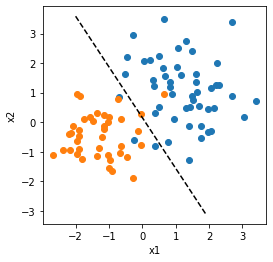

In [213]:
# Plot the data together with the fit.
plt.figure(figsize=(4,4))

# Plot the data:
plt.plot(xA[:,0], xA[:,1], 'o')
plt.plot(xB[:,0], xB[:,1], 'o')
plt.xlabel('x1')
plt.ylabel('x2')

# Plot the fit:
x0_array = np.arange(-2,2,0.1)
x1_array = -x0_array*a[0]/a[1] + b/a[1]
plt.plot(x0_array, x1_array, '--k')

According to this classifier, the label $y=0$ will be predicted for a new data point lying on one side of the above line, while the label $y=1$ will be predicted for a new data point lying on the other side.